# COVID-19 Prediction Model


# (1) Applying Linear and Polynomial Regression to COVID-19 cases to plot future cases and Recoveries in Kenya

# (2) Data Visualization of COVID-19 cases  Over time in Kenya

Importing required Python Packages and Libraries

In [343]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
!pip install pyramid-arima
!pip install plotly


  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima: started
    Running setup.py install for pyramid-arima: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\caro\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\caro\\AppData\\Local\\Temp\\pip-install-7dyksvf3\\pyramid-arima\\setup.py'"'"'; __file__='"'"'C:\\Users\\caro\\AppData\\Local\\Temp\\pip-install-7dyksvf3\\pyramid-arima\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\caro\AppData\Local\Temp\pip-wheel-6v_p03z8'
       cwd: C:\Users\caro\AppData\Local\Temp\pip-install-7dyksvf3\pyramid-arima\
  Complete output (171 lines):
  Partial import of pyramid during the build process.
  Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
  Adding extra setuptools args
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; tr

In [344]:
covid=pd.read_csv("Kenya_covid_19_dataFinal.csv")
print (covid)

       SNo ObservationDate  Province/State Country/Region  Confirmed  Deaths  \
0     5285      03/13/2020             nan          Kenya          1       0   
1     5617      03/14/2020             nan          Kenya          1       0   
2     5873      03/15/2020             nan          Kenya          3       0   
3     6106      03/16/2020             nan          Kenya          3       0   
4     6389      03/17/2020             nan          Kenya          3       0   
..     ...             ...             ...            ...        ...     ...   
146  80520      08/06/2020             nan          Kenya      24411     399   
147  81263      08/07/2020             nan          Kenya      25138     413   
148  82006      08/08/2020             nan          Kenya      25837     418   
149  82749      08/09/2020             nan          Kenya      26436     420   
150  83492      08/10/2020             nan          Kenya      26928     423   

     Recovered  
0            0  
1    

In [345]:
covid.shape

(151, 7)

In [346]:
covid.describe()

,SNo,Province/State,Confirmed,Deaths,Recovered
count,151.000000,0.000000,151.000000,151.000000,151.000000
mean,36447.814570,nan,5196.662252,104.013245,1980.284768
std,23276.693383,nan,7178.309179,115.626409,3092.598457
min,5285.000000,nan,1.000000,0.000000,0.000000
25%,16656.000000,nan,275.500000,14.000000,68.000000
50%,29962.000000,nan,1471.000000,55.000000,408.000000
75%,55830.500000,nan,7382.500000,156.500000,2192.000000
max,83492.000000,nan,26928.000000,423.000000,13495.000000


# DATA PREPROCESSING

In [347]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (151, 7)
Checking for null values:
 SNo                  0
ObservationDate      0
Province/State     151
Country/Region       0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State     float64
Country/Region      object
Confirmed            int64
Deaths               int64
Recovered            int64
dtype: object


In [348]:
#Converting "Observation Date" into Datetime format
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [349]:
# Show the number of missing (NAN, NaN, na) data for each column
covid.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     151
Country/Region       0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [350]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["Province/State"],1,inplace=True)

In [351]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [383]:
total_cases = datewise['Confirmed'].iloc[-1]   
total_deaths = datewise['Deaths'].iloc[-1]
total_recovered = datewise['Recovered'].iloc[-1]
closed_cases = total_deaths + total_recovered
active_cases = total_cases - closed_cases

print(f'As of {datewise.index[-1]} the total number of COVID-19 confirmed cases is: {total_cases}')
print(f'As of {datewise.index[-1]} the total number of COVID-19 deaths is: {total_deaths}')
print(f'As of {datewise.index[-1]} the total number of COVID-19 recoveries is: {total_recovered}')
print(f'As of {datewise.index[-1]} the total number of COVID-19 closed cases is: {closed_cases}')
print(f'As of {datewise.index[-1]} the total number of COVID-19 active cases is: {active_cases}')

As of 2020-08-10 00:00:00 the total number of COVID-19 confirmed cases is: 26928
As of 2020-08-10 00:00:00 the total number of COVID-19 deaths is: 423
As of 2020-08-10 00:00:00 the total number of COVID-19 recoveries is: 13495
As of 2020-08-10 00:00:00 the total number of COVID-19 closed cases is: 13918
As of 2020-08-10 00:00:00 the total number of COVID-19 active cases is: 13010


# Visualizing the trend of cases over time

In [353]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=datewise.index, y = datewise['Confirmed'], mode='lines+markers',name='Confirmed Cases'))
figure.add_trace(go.Scatter(x=datewise.index, y = datewise['Deaths'], mode='lines+markers',name='Deaths'))
figure.add_trace(go.Scatter(x=datewise.index, y = datewise['Recovered'], mode='lines+markers',name='Recoveries'))
figure.update_layout(title_text='Trend of Covid-19 Cumulative cases', plot_bgcolor='rgb(230, 230, 230)')
figure.show()


In [354]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases. Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases

In [355]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases Kenya",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()


Closed Cases = Number of Recovered Cases + Number of Death Cases Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

In [356]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in Kenya",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [357]:
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 2.8798908295370387
Median Mortality Rate 2.790448081566944
Average Recovery Rate 27.0096048887014
Median Recovery Rate 31.259720062208395


In [358]:
from sklearn.linear_model import LinearRegression, BayesianRidge

# 𝘒𝘦𝘳𝘯𝘦𝘭 𝘋𝘦𝘯𝘴𝘪𝘵𝘺 𝘌𝘴𝘵𝘪𝘮𝘢𝘵𝘪𝘰𝘯 (𝘒𝘋𝘌) 𝘗𝘭𝘰𝘵 𝘊𝘩𝘢𝘳𝘵𝘴.

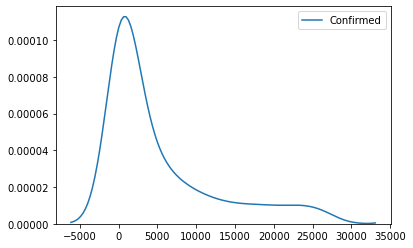

In [359]:
sns.kdeplot(covid.Confirmed)

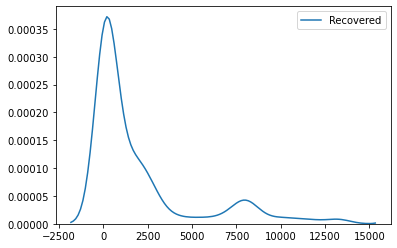

In [360]:
sns.kdeplot(covid.Recovered)

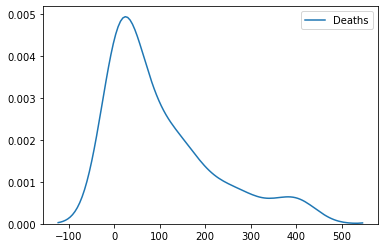

In [361]:
sns.kdeplot(covid.Deaths)

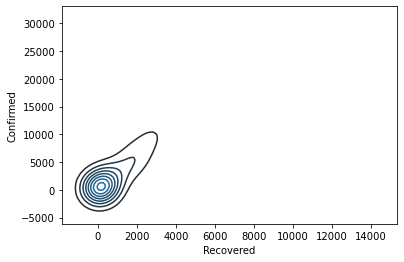

In [362]:
sns.kdeplot(covid.Recovered , covid.Confirmed)

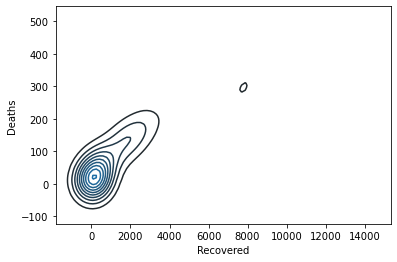

In [363]:

sns.kdeplot(covid.Recovered ,covid.Deaths)

# 𝘉𝘰𝘹 𝘗𝘭𝘰𝘵 𝘊𝘩𝘢𝘳𝘵𝘴.

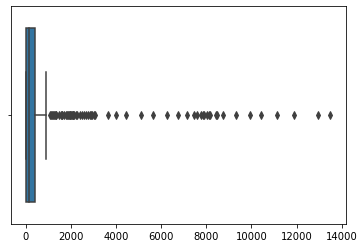

In [364]:
sns.boxplot([covid.Deaths, covid.Recovered])

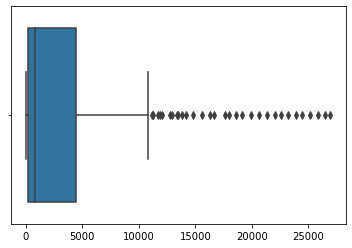

In [365]:
sns.boxplot([covid.Recovered , covid.Confirmed])

# 𝘝𝘪𝘰𝘭𝘪𝘯 𝘗𝘭𝘰𝘵 𝘊𝘩𝘢𝘳𝘵𝘴.

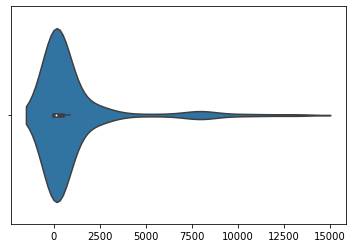

In [366]:
sns.violinplot([covid.Deaths, covid.Recovered])

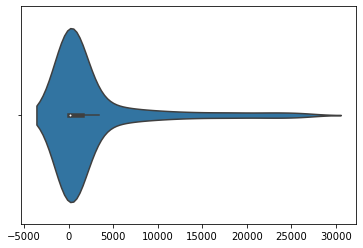

In [367]:
sns.violinplot([covid.Deaths, covid.Confirmed])

# Prediction using Machine Learning Models

# linear regression model

In [369]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [370]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [371]:
lin_reg=LinearRegression(normalize=True)

In [372]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(normalize=True)

In [373]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [374]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  12131.606741086882


In [375]:
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

The trend of Confirmed Cases in absolutely not Linear

# Polynomial Regression for Prediction of Confirmed Cases

In [376]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [377]:
poly = PolynomialFeatures(degree = 8)

In [378]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [379]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [380]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  147.83942065815893


In [384]:

comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [385]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',name="Train Data for recovered Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>